In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
PATH_TO_DATA = './data/'
products = pd.read_csv(f'{PATH_TO_DATA}products.csv')
orders = pd.read_csv(f'{PATH_TO_DATA}orders.csv')
order_products_prior = pd.read_csv(f'{PATH_TO_DATA}order_products__prior.csv')
order_products_train = pd.read_csv(f'{PATH_TO_DATA}order_products__train.csv')
departments = pd.read_csv(f'{PATH_TO_DATA}departments.csv')
aisles = pd.read_csv(f'{PATH_TO_DATA}aisles.csv')

<img src="data_table_schema.png" style="height: 400px;">

In [46]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [4]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [81]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [61]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
orders_without_nan = orders.dropna(axis=0, how='any')
orders_without_nan_prior = orders_without_nan[orders_without_nan["eval_set"] == "prior"]
orders_without_nan_prior

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [7]:
order_count = order_products_prior.groupby("order_id")["product_id"].count()
order_count.rename("count", inplace=True)
order_count

order_id
2           9
3           8
4          13
5          26
6           3
           ..
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: count, Length: 3214874, dtype: int64

In [8]:
order_days = orders_without_nan_prior[["order_id", "days_since_prior_order"]]
order_days

,order_id,days_since_prior_order
1,2398795,15.0
2,473747,21.0
3,2254736,29.0
4,431534,28.0
5,3367565,19.0
...,...,...
3421077,2558525,22.0
3421078,2266710,29.0
3421079,1854736,30.0
3421080,626363,18.0


In [9]:
order_count_dates = order_days.merge(order_count, on="order_id", how="left")
order_count_dates.corr()

,order_id,days_since_prior_order,count
order_id,1.000000,0.000836,-0.000342
days_since_prior_order,0.000836,1.000000,0.059389
count,-0.000342,0.059389,1.000000


Кількість днів від попередньої покупки майже не впливає на кількість куплених товарів

<Axes: xlabel='days_since_prior_order', ylabel='count'>

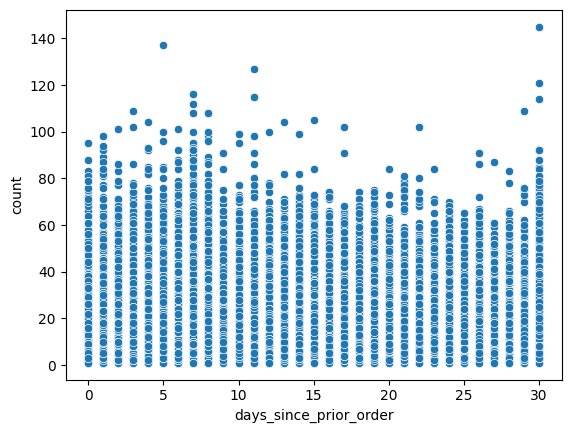

In [10]:
sns.scatterplot(data=order_count_dates, x="days_since_prior_order", y="count")

In [11]:
products["department_id"].value_counts()

department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

In [12]:
product_count = order_products_prior.groupby("product_id")["order_id"].count()
product_count.rename("count", inplace=True)
product_count

product_id
1        1852
2          90
3         277
4         329
5          15
         ... 
49684       9
49685      49
49686     120
49687      13
49688      89
Name: count, Length: 49677, dtype: int64

In [40]:
for i in range(20, 301, 20):
    product_count_less_i_count = product_count[product_count.values < i]
    print(i, " - ", product_count_less_i_count.count().iloc[0])

20  -  13755
40  -  20730
60  -  24817
80  -  27647
100  -  29610
120  -  31237
140  -  32551
160  -  33638
180  -  34527
200  -  35337
220  -  36035
240  -  36674
260  -  37253
280  -  37783
300  -  38251


У нас загалом 49688 унікальних найменувань продуктів, проте 29610 з них купувались менше 100 разів. Враховуючи, що в датасеті 33млн покупок, то ці дані для нас не релевантні і ми можемо їх відкинути.

In [52]:
product_count_more_100 = product_count[product_count.values > 100]
products_final = products[products["product_id"].isin(product_count_more_100.index)]
products_final

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
...,...,...,...,...
49678,49679,Famous Chocolate Wafers,61,19
49679,49680,All Natural Creamy Caesar Dressing,89,13
49681,49682,California Limeade,98,7
49682,49683,Cucumber Kirby,83,4


Також видалимо всі замовлення, в яких були ці продукти. Ми можемо це зробити, бо у нас і так доволі багато даних

In [55]:
product_count_less_100 = product_count[product_count.values <= 100]
order_index = order_products_prior[order_products_prior["product_id"].isin(product_count_less_100.index)]["order_id"]
order_products_prior_final = order_products_prior[~order_products_prior["order_id"].isin(order_index)]
order_products_prior_final

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [70]:
order_products_prior["order_id"].count() - order_products_prior_final["order_id"].count()

8420926

Отже у нас залишилось 24 млн покупок з 33 млн. Тепер потрібно видалити непотрібні дані з таблиць orders та order_products_train, та глянути розподіл по категоріях продуктів

In [74]:
order_train_index = order_products_train[~order_products_train["product_id"].isin(products_final["product_id"])]["order_id"].unique()
order_products_train_final = order_products_train[~order_products_train["order_id"].isin(order_train_index)]
order_products_train_final

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [77]:
order_products_train["order_id"].count() - order_products_train_final["order_id"].count()

436265

In [83]:
orders_test = orders[orders["eval_set"] == "test"]

In [85]:
orders_final = orders[(orders["order_id"].isin(order_products_prior_final["order_id"])) | (orders["order_id"].isin(order_products_train_final["order_id"]))]
orders_final

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [87]:
order_products_prior_final["order_id"].nunique() + order_products_train_final["order_id"].nunique()

2699926

Зберігаємо оновлений датасет

In [94]:
PATH_TO_SAVE_DATA = './data_new/'
order_products_prior_final.to_csv(f"{PATH_TO_SAVE_DATA}order_products_prior_final.csv", index=False)
order_products_train_final.to_csv(f"{PATH_TO_SAVE_DATA}order_products_train_final.csv", index=False)
products_final.to_csv(f"{PATH_TO_SAVE_DATA}products_final.csv", index=False)
orders_final.to_csv(f"{PATH_TO_SAVE_DATA}orders_final.csv", index=False)

In [90]:
products_final["department_id"].value_counts()

department_id
19    2789
16    2140
1     2048
7     1963
13    1954
4     1131
17    1020
11     966
15     925
9      856
3      831
20     698
14     617
18     466
12     438
6      400
8      276
5      239
21     112
2       84
10      26
Name: count, dtype: int64

перевіримо, як розподілені продукти, які ми викинули по категоріях

In [93]:
products_non_include = products.merge(products_final, on="product_id", how="outer")
products_non_include["department_id_x"].value_counts()

department_id_x
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64